In [9]:
import matplotlib.pyplot as plt
import sys, os, glob

In [29]:
metrics = {}
files = glob.glob("./*.csv")

In [30]:
print files

['./legacy_multifit_gpu_teslaK40c.csv', './multifit_cpu.csv', './multifit_gpu_teslaK40c.csv', './multifit_gpu_v100.csv', './legacy_multifit_cpu.csv', './legacy_multifit_gpu_v100.csv']


In [31]:
for f in files:
    with open(f, "r") as fin:
        label = f[2:-4].replace("multifit_", "")
        print label
        line = fin.readline()
        metrics[label] = map(float, line.rstrip().split(','))

legacy_gpu_teslaK40c
cpu
gpu_teslaK40c
gpu_v100
legacy_cpu
legacy_gpu_v100


In [32]:
print metrics

{'legacy_gpu_v100': [3.11111, 4.22222, 7.0, 11.0, 19.0, 38.0, 76.0], 'gpu_v100': [2.77778, 3.11111, 6.0, 10.0, 17.5556, 34.5556, 68.7778], 'legacy_gpu_teslaK40c': [7.0, 8.55556, 16.0, 27.0, 48.0, 91.0, 179.111], 'gpu_teslaK40c': [5.0, 7.22222, 13.1111, 22.8889, 44.2222, 81.5556, 141.778], 'legacy_cpu': [5.0, 11.0, 23.1, 53.8, 92.0, 185.1, 369.3], 'cpu': [4.0, 8.2, 17.0, 34.2, 68.0, 136.3, 277.7]}


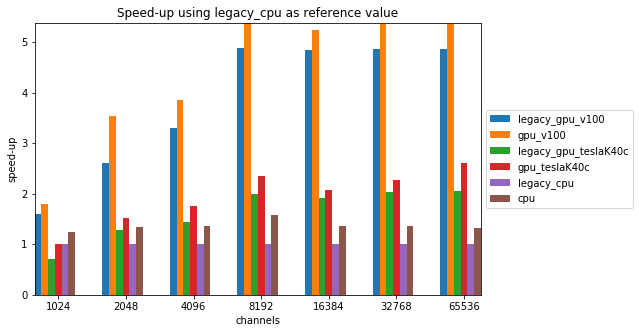

In [36]:
channels = [2 ** x for x in range(10, 17)]
format = 'pdf'

fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
ax = plt.subplot(111)
w = 0.1 
base_label = "legacy_cpu"
x = list(range(len(metrics[base_label])))
    
# ax.set_xticks(x)
for label in metrics:
    ax.bar(x, [(a/b) for a, b in zip(metrics[base_label],
                                     metrics[label])], width=w, label=label, align='center')
    x = [x + w for x in x]

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
ax.set_ylabel('speed-up')
ax.set_xlabel('channels')
ax.set_xticks([x-(len(channels)/2 * w) for x in x])
ax.set_xticklabels(channels)
ax.autoscale(tight=True)
ax.set_title('Speed-up using %s as reference value' % base_label)
ax.legend(loc='center left' , bbox_to_anchor=(1, 0.5))

# ax.legend(loc='upper left')
fig.savefig('bar_plot.'+format, format=format)
plt.show()